Large data samples are collected at the LHCb experiment. From these samples we want to select specific particle decays so they can be studied. The first stage of the selection process is a trigger. It's main job is to select signal and reject background with loose requirements on discriminating variables. 

In this case, the particle decay we are interested in selecting is $\Lambda_c^+\to pK\pi$. The mass distribution of $\Lambda_c^+\to pK\pi$ candidates that pass the trigger requirements is displayed below.

Text(0, 0.5, 'Candidates / 15 MeV/c$^2$')

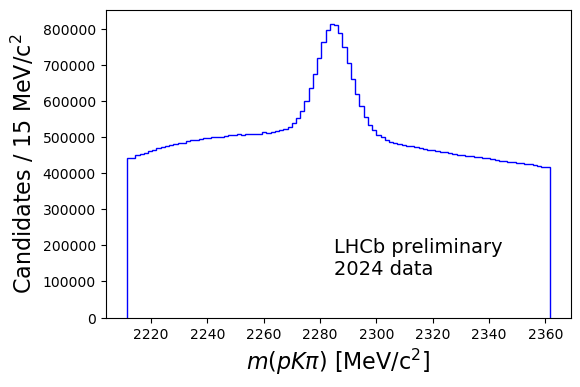

In [17]:
from Data import LoadNFiles
import matplotlib.pyplot as plt

df = LoadNFiles(["Lc_M"], n=20)

fig, ax = plt.subplots(figsize=(6,4))
_ = ax.hist(df["Lc_M"], bins=100, color='b', histtype='step')
ax.text(2285, 120e3, "LHCb preliminary\n2024 data", fontsize=14)
ax.set_xlabel("$m(pK\pi)$ [MeV/c$^2$]", fontsize=16)
ax.set_ylabel("Candidates / 15 MeV/c$^2$", fontsize=16)

Clearly, there is a nice signal peak around 2282 MeV/c$^2$. However, the sample is swamped by background. To perform precision studies we need a cleaner sample. This is the job of the BDT.

To train the BDT we use a background rich sample from data, specifically those with a very high and low masses, and a simulated sample to represent signal. We look at discriminating variables, for example the $\chi^2$ from a fit to the proton impact parameter.

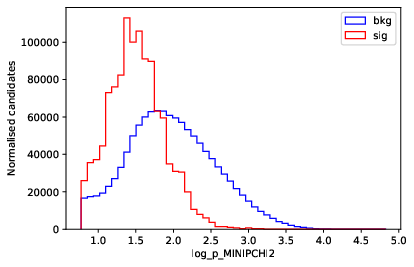

In [46]:
import os
from wand.image import Image as WImage
img = WImage(filename='{}/output/reduced_after_comp/log_p_MINIPCHI2.pdf'.format(os.environ["BASE"]))
img


After the BDT is trained we apply it to the data. The figure below displays the mass distribution of candidates after BDT training with the optimal requirement.

Text(0, 0.5, 'Candidates / 15 MeV/c$^2$')

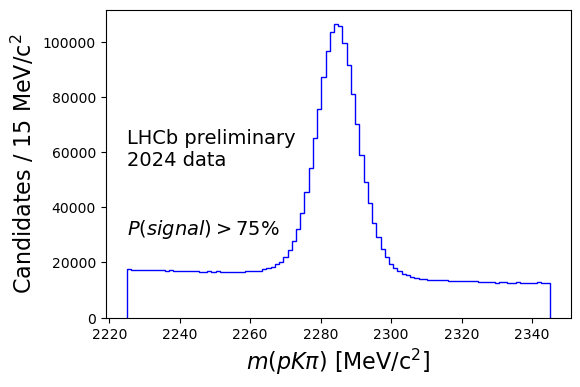

In [45]:
import uproot

df_applied = uproot.open("/data/lhcb/users/mackay/LcTraining/reduced_after_comp/data_with_bdt.root:tree").arrays(["Lc_M", "signal_score"], library="pd")

cut_to_apply = "signal_score>0.75"

fig, ax = plt.subplots(figsize=(6,4))
n, bins, patches = ax.hist(df_applied.query(cut_to_apply)["Lc_M"], bins=100, color='b', histtype='step')
ax.text(2225, 55e3, "LHCb preliminary\n2024 data", fontsize=14)
ax.text(2225, 30e3, "$P(signal)>75\%$", fontsize=14)
ax.set_xlabel("$m(pK\pi)$ [MeV/c$^2$]", fontsize=16)
ax.set_ylabel("Candidates / 15 MeV/c$^2$", fontsize=16)